<a href="https://colab.research.google.com/github/brandnewmin/brandnewm/blob/master/ch2%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mglearn

     |████████████████████████████████| 540 kB 5.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=18a9822f2dc5e4ef1ab54eae7627bfb93e79a12d6d222b996d5b23a0b648e542
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

# 2장-지도학습

# 지도학습 알고리즘

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape : (26, 2)


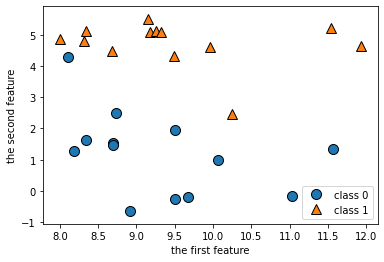

In [3]:
#분류용 데이터셋
X,y = mglearn.datasets.make_forge() 

mglearn.discrete_scatter(X[:,0],X[:,1],y) #x,y축으로 특성 2개를 넣고 y도 따로 들어가는군?!
#y는 어떻게 들어가는거야? y는 점이야 세모나 동그라미
plt.legend(['class 0','class 1'],loc = 4)
plt.xlabel('the first feature')
plt.ylabel('the second feature')
print('X.shape :', X.shape)

In [4]:
mglearn.datasets.make_forge()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


(array([[ 9.96346605,  4.59676542],
        [11.0329545 , -0.16816717],
        [11.54155807,  5.21116083],
        [ 8.69289001,  1.54322016],
        [ 8.1062269 ,  4.28695977],
        [ 8.30988863,  4.80623966],
        [11.93027136,  4.64866327],
        [ 9.67284681, -0.20283165],
        [ 8.34810316,  5.13415623],
        [ 8.67494727,  4.47573059],
        [ 9.17748385,  5.09283177],
        [10.24028948,  2.45544401],
        [ 8.68937095,  1.48709629],
        [ 8.92229526, -0.63993225],
        [ 9.49123469,  4.33224792],
        [ 9.25694192,  5.13284858],
        [ 7.99815287,  4.8525051 ],
        [ 8.18378052,  1.29564214],
        [ 8.7337095 ,  2.49162431],
        [ 9.32298256,  5.09840649],
        [10.06393839,  0.99078055],
        [ 9.50048972, -0.26430318],
        [ 8.34468785,  1.63824349],
        [ 9.50169345,  1.93824624],
        [ 9.15072323,  5.49832246],
        [11.563957  ,  1.3389402 ]]),
 array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 

In [5]:
X

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [6]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

Text(0, 0.5, 'target')

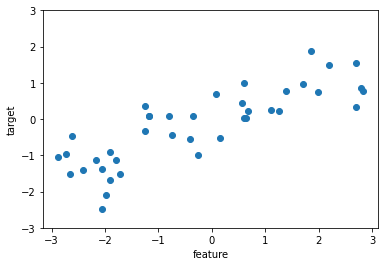

In [7]:
#회귀예측용 데이터셋
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('feature')#특성
plt.ylabel('target')#타깃

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cnacer.keys():\n", cancer.keys())

cnacer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [9]:
print("유방암 데이터의 형태 :",cancer.data.shape)

유방암 데이터의 형태 : (569, 30)


In [10]:
print("클래스별 샘플 개수 :\n",{n : v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})
#zip -> 대응
#n = cancer.target_names :: malignant, benign
#z = np.bincount(cancer.target) :: 212, 357
#n:v 출력하라 

클래스별 샘플 개수 :
 {'malignant': 212, 'benign': 357}


In [11]:
print("특성 이름 :\n", cancer.feature_names)

특성 이름 :
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [12]:
#회귀분석용 실제 데이터셋 : 보스턴 주변의 주택 평균 가격 예측이 목표
from sklearn.datasets import load_boston
boston = load_boston()

print("데이터의 형태 :", boston.data.shape)

데이터의 형태 : (506, 13)


In [13]:
type(boston.data)

numpy.ndarray

In [14]:
type(boston)

sklearn.utils.Bunch

In [15]:
boston.DESCR
#자세한 정보를 확인할 수 있다고 함
#그다지 이해되진 않음

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [16]:
#특성끼리 곱하여 데이터셋을 의도적으로 확장(이러면 다중공선성 안생기나?) = "특성공학"
X,y = mglearn.datasets.load_extended_boston()
#특성끼리 어떻게 곱했는지 코딩으로 보여준 것은 아님
#original datasets load_boston에서 extended 한 버전이 현재 셀(cell)
print("X.shape :", X.shape)
#어떻게 이런 값이 나오는가? PolynomialFeatures 함수를 사용해 중복을 포함한 조합 생성(초기하분포)

X.shape : (506, 104)


# k-최근접 이웃
  * 새로운 데이터 포인트에 대해 예측할 때 훈련 데이터셋에서 갖아 가까운 데이터 포인트를 찾는다

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


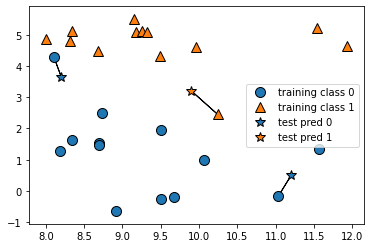

In [17]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


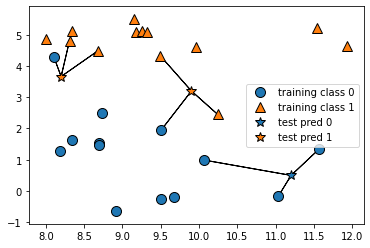

In [18]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [19]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
#X에서 일부 X_train , X_test 이렇게 나누는듯?

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [20]:
X

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [21]:
X_train == X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [22]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [23]:
#책 65 : 훈련세트를 사용하여 분류 모델을 학습시킵니다.
clf.fit(X_train, y_train)
#KNeighborsClassifier의 특징 : y값이 범주형, x값이 연속형, 새로운 값을 분류이자 예측
#아마도 y가 범주형이니깐 분류로 보는게 좋을듯?

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [24]:
print("테스트 세트 예측 :", clf.predict(X_test))

테스트 세트 예측 : [1 0 1 0 1 0 0]


In [25]:
print("테스트 세트 정확도 : {:.2f}".format(clf.score(X_test, y_test)))
#X_test와 clf.predict(X_test)값은 다른데 왜 후자가 아니라 바로 _test라고 하는거야?

테스트 세트 정확도 : 0.86


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0, flags=flags)


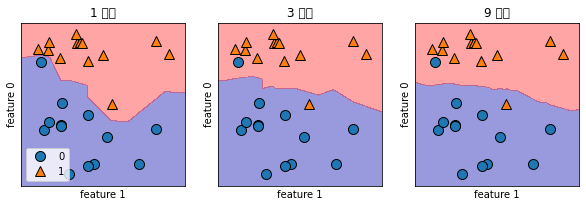

In [26]:
fig, axes = plt.subplots(1,3, figsize = (10,3))

for n_neighbors , ax in zip([1,3,9], axes):
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
  #n_neighbors 를 특정한 값으로만 정할 수 없어서.
  mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax =ax , alpha=.4)
  mglearn.discrete_scatter(X[:,0],X[:,1], y, ax=ax)
  ax.set_title('{} 이웃'.format(n_neighbors))
  ax.set_ylabel('feature 0')
  ax.set_xlabel('feature 1')
axes[0].legend(loc = 3) #loc = 3 : legend(범례) 위치

#이웃의 수가 늘어날수록 결정경계가 부드러워지며, 단순한 모델이 되고있음을 말한다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0, flags=flags)


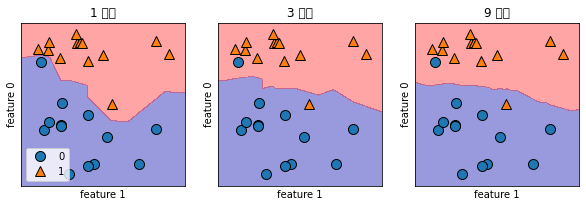

In [27]:
fig

In [28]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f288d597450>,
      dtype=object)

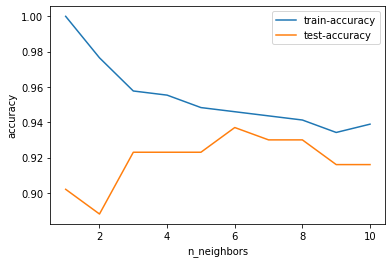

In [29]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state = 66
)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  training_accuracy.append(clf.score(X_train, y_train))
  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label = 'train-accuracy')#훈련 정확도
plt.plot(neighbors_settings, test_accuracy, label = 'test-accuracy')#테스트 정확도
plt.ylabel('accuracy') #정확도
plt.xlabel('n_neighbors') #n_neighbors 수
plt.legend() #있으면 범례가 있고 없으면 없는

  # k-최근접 이웃 회귀

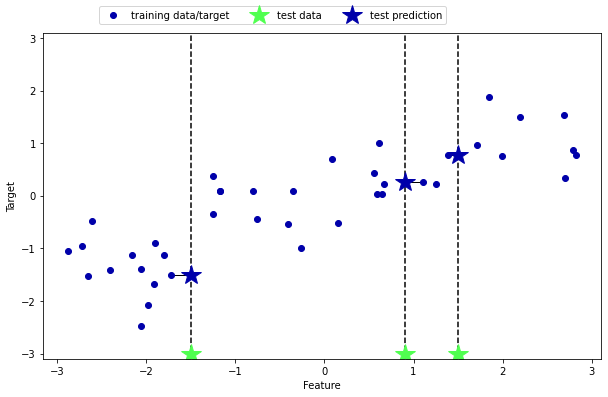

In [30]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

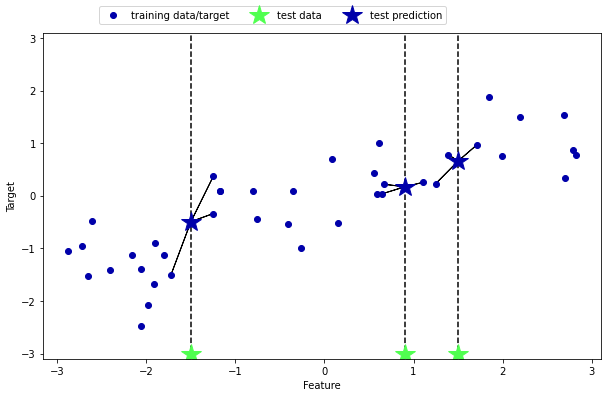

In [31]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [32]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [33]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [34]:
print("테스트 세트 r^2 : {:.2f}".format(reg.score(X_test,y_test)))
#결정계수 : 모델링이 얼마나 잘 설명하는가

테스트 세트 r^2 : 0.83


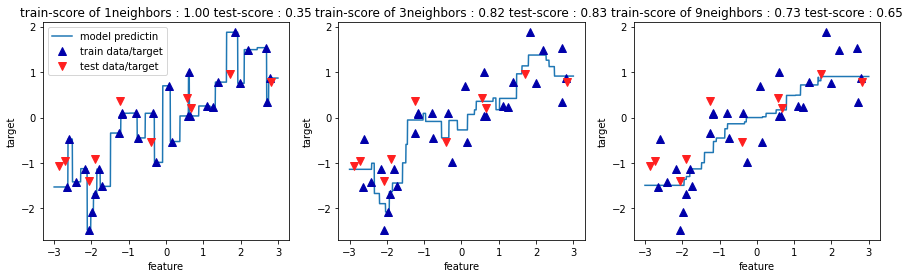

In [35]:
fig, axes = plt.subplots(1,3, figsize = (15,4))
line = np.linspace(-3,3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
  ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)

  ax.set_title(
      'train-score of {}neighbors : {:.2f} test-score : {:.2f}'.format(
          n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test))
  )
  #{}이웃의 훈련 스코어, 테스트 스코어
  ax.set_xlabel('feature')
  ax.set_ylabel('target')
axes[0].legend(['model predictin','train data/target','test data/target'], loc = 'best')
                #모델 예측, 훈련 데이터/타깃, 테스트 데이터/타깃

# 선형모델

w[0]: 0.393906  b: -0.031804


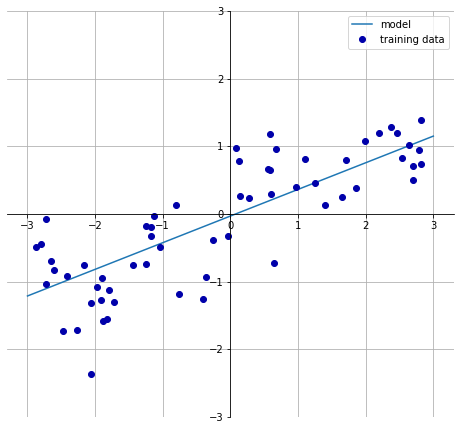

In [36]:
mglearn.plots.plot_linear_regression_wave()

In [37]:
#선형회귀/최소제곱법 : 회귀용 알고리즘
#평균제곱오차를 최소화하는 파라미터를 찾기

from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)

In [38]:
print("lr.coef_ : ",lr.coef_)
#너는 언제부터 그런 모양이었니? 각 입력특성에 하나씩 대응되는 numpy 배열
#입력특성이 하나라서 lr.coef_원소를 하나만 가지고 있을뿐
##그렇다면 다중회귀에선 lr.coef_ 원소가 여러개인걸 확인할 수 있어?

print("lr.intercept_ : {:.2f}".format(lr.intercept_))

lr.coef_ :  [0.39390555]
lr.intercept_ : -0.03


In [39]:
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
#.score 함수 : 결정계수 계산 함수 : 결정계수란? 함수식을 얼마나 잘 설명하는지

훈련 세트 점수 : 0.67


In [40]:
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

테스트 세트 점수 : 0.66


In [41]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test,y_test)))
#훈련세트점수와 테스트세트 점수 간의 차이가 너무 크다. 과대적합되었다고 판단

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


* 리지 회귀

In [42]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))

훈련 세트 점수 : 0.89


In [43]:
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

테스트 세트 점수 : 0.75


In [44]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
#alpha의 기능 : alpha 값이 클수록 계수를 0에 가깝게 한다. (값이 클수록 모델을 단순호함)
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64


In [45]:
#alpha = 0.1은 위의 셀보다 모델이 복잡함
#구체적으로 식이 어떻게 생겼는지는 나도 몰라 근데 이렇게 모르고 식을 써도 되는거야?
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test,y_test)))

훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.77


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_te

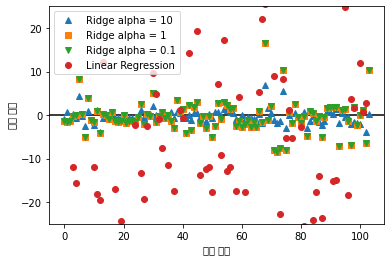

In [46]:
plt.plot(ridge10.coef_, '^', label = 'Ridge alpha = 10')
plt.plot(ridge.coef_, 's', label = 'Ridge alpha = 1')
plt.plot(ridge.coef_, 'v', label = 'Ridge alpha = 0.1')
#그림을 해석해봐 : ridge모델의 alpha 값에 따라서 그림을 그렸는데 x축과 y축은 각각 뭐야?#

plt.plot(lr.coef_,'o',label = 'Linear Regression')
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
"""
77쪽에서 특성은 104개가 있다고 했잖아
ridge 모델링을 했을 때 데이터 프레임 104개에 대해서 표현한 것인가?
x=1의 계수크기가 0인 ridge10 모델이면, ridge10 식에는 x1이 없는건가?
81쪽에 설명이 자세히 나온듯? 대강 맥락은 맞는 것 같고, 다만 x=1이 x1이 아니라 x2인듯
"""
xlims = plt.xlim() #이건 왜 있는지 모르겠어
plt.hlines(0, xlims[0], xlims[1]) #hlines y, x(range(a,b))
plt.xlim(xlims) #x축 범위 지정
plt.ylim(-25,25) #y축 범위 지정
plt.legend() #범례

In [47]:
"""
plt.plot(ridge10.coef_, '^', label = 'Ridge alpha = 10')

#xlims = plt.xlim() #굳이 왜 넣은거지?
#print(xlims)
plt.hlines(1, xlims[0], 50) #xlim[0] = -5.15, xlim[1] = 108.15인듯
#hlines가 어디서부터 어디까지 그어질지 선을 지정해줌
#1은 hlines의 y값 정해줌
#plt.xlim(xlims) #x값 범위
plt.xlim()
#plt.ylim(-25,25) #y값 범위
#plt.legend()#범례 표시
"""

"\nplt.plot(ridge10.coef_, '^', label = 'Ridge alpha = 10')\n\n#xlims = plt.xlim() #굳이 왜 넣은거지?\n#print(xlims)\nplt.hlines(1, xlims[0], 50) #xlim[0] = -5.15, xlim[1] = 108.15인듯\n#hlines가 어디서부터 어디까지 그어질지 선을 지정해줌\n#1은 hlines의 y값 정해줌\n#plt.xlim(xlims) #x값 범위\nplt.xlim()\n#plt.ylim(-25,25) #y값 범위\n#plt.legend()#범례 표시\n"

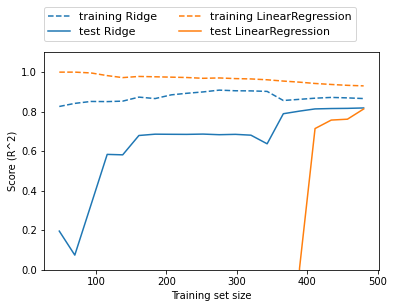

In [48]:
#규제의 효과를 이해하는 또 다른 방법 : alpha 값 고정, 훈련 데이터 크기 변화
mglearn.plots.plot_ridge_n_samples()

* 라소
: 리지회귀와 같이 라소도 회귀계수를 0으로 만들려고 한다.(특성 선택이 자동으로 이루어진다)
L1규제라고도 한다.

In [49]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수 : ", np.sum(lasso.coef_ != 0))

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 개수 :  4


In [53]:
lasso.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -5.3529079 , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.  

In [54]:
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train,y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso001.score(X_test, y_test)))
#score함수 : 결정계수
print("사용한 특성의 개수 : ", np.sum(lasso001.coef_ != 0))

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용한 특성의 개수 :  33


In [55]:
#모델을 더 복잡하게
#alpha값을 더 낮추면 규제의 효과가 없다. 아 특성을 많이 반영한다 이 말인가?
#복잡한 모델은 특성이 더 많음을 의미하잖아. 그러니깐 규제의 효과가 떨어지는거지
#규제란? 아마도..  모델의 특성을 줄이는 일?


In [56]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso00001.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test,y_test)))
print("사용한 특성의 개수 : ", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수 : 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수 :  96


Text(0, 0.5, 'coef size')

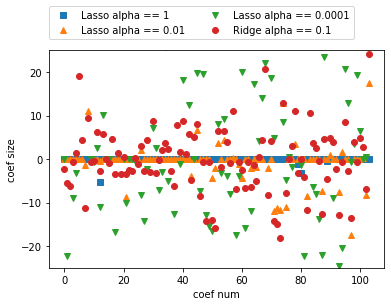

In [61]:
plt.plot(lasso.coef_, 's',label = 'Lasso alpha == 1')
plt.plot(lasso001.coef_,'^',label = 'Lasso alpha == 0.01')
plt.plot(lasso00001.coef_, 'v',label = 'Lasso alpha == 0.0001')

plt.plot(ridge01.coef_,'o',label = 'Ridge alpha == 0.1')
plt.legend(ncol = 2, loc = (0,1.05))
#legend 모양과 위치 설정 : ncol = 2 (legend 내에 칼럼 2개) , loc = (0,1.05) (legend 위치 x = 0, y = 1.05 위치)
plt.ylim(-25,25)
plt.xlabel("coef num") #계수 목록
plt.ylabel("coef size") #계수 크기

In [ ]:
#L1 L2규제의 정의를 모르는 것 같고

* 분류용 선형 모델

In [62]:
#이진 분류
#86쪽

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


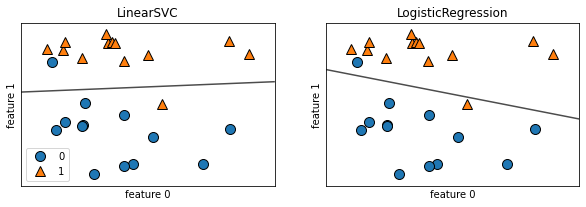

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig ,axes = plt.subplots(1,2, figsize = (10,3))
for model, ax in zip([LinearSVC(max_iter = 5000), LogisticRegression()], axes):
  clf = model.fit(X,y)
  mglearn.plots.plot_2d_separator(clf, X, fill = False, eps = 0.5,
                                 ax= ax, alpha = .7) #이게 없으면 평면을 나누는 선이 없어
  #2차원 데이터셋 분할 평면 그리기(모델명, X, fill = 배경색 아니요(false),
                                  #eps = (점-세모와 동그라미-를 이동시켜), alpha = 선의 진함정도)
  mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
  ax.set_title(clf.__class__.__name__)
  ax.set_xlabel('feature 0')
  ax.set_ylabel('feature 1')
axes[0].legend()
#L2 규제를 사용한다 (L2 norm을 활용한 값)

In [82]:
#linearregression, linearsvc 의 규제 강도를 C가 결정한다.(앞서 모델-리지,라소-은 alpha값으로 조정했던듯)

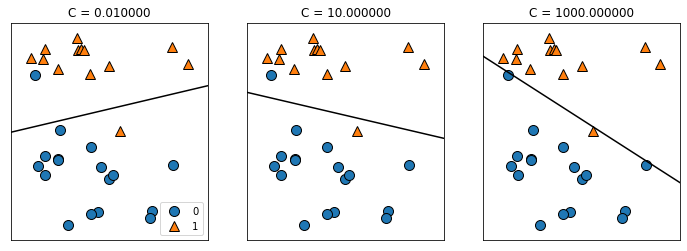

In [83]:
mglearn.plots.plot_linear_svc_regularization()
#그림만 봐선 분류 선의 뭐가 더 복잡한 지 잘 모르겠어
#왼쪽일수록 규제가 크고 오른쪽일수록 규제가 작다
#규제가 크다는건 모델이 단순하다는 의미 = feature 개수가 적다  alpha랑 반대

In [84]:
from sklearn.datasets import load_breast_cancer #유방암 데이터

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target , random_state = 42)
#stratify : 
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)

print("훈련 세트 점수 : {:.2f}".format(logreg.score(X_train, y_train)))

훈련 세트 점수 : 0.96


stratify : 훈련 데이터를 나눌 때 무작위로 샘플링을 하지만, original datasets의 클래스 비율이 train, test set에서도 동일하게 유지되도록 함
_(무작위로 샘플링 방법은 random_state  = 42)_를 택한듯함
random_state = 42 : 다음에 계산할 때도 동일한 결과 반복 재현 가능하게 한 것